In [24]:
import time
t=time.time()
import pandas as pd
import numpy as np
import util
import pyBigWig
import seaborn as sns
import glob

In [70]:
hv=pd.read_csv('data/hv.csv',index_col=0)

In [71]:
bws=glob.glob('data/meth/t4/*.bw')
names=['o','y']
bws.sort()
for i in range(len(bws)):
    name=names[i]
    bw=pyBigWig.open(bws[i])
    hv[name]=hv.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean')[0],axis=1)

<AxesSubplot:>

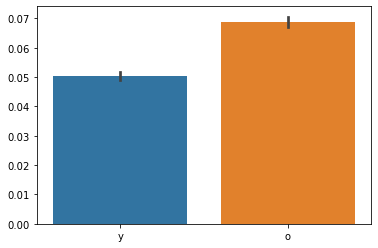

In [137]:
sns.barplot(data=hv[['y','o']])

<AxesSubplot:xlabel='ezc', ylabel='value'>

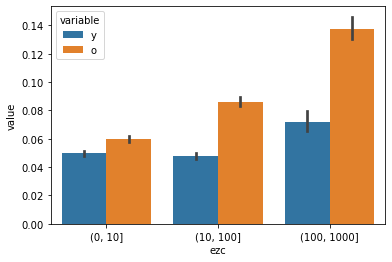

In [138]:
hv['ezc']=pd.cut(hv.ez,[0,10,100,1000])
sns.barplot(data=hv[['y','o','ezc']].melt('ezc'),hue='variable',x='ezc',y='value')

<AxesSubplot:xlabel='ec', ylabel='value'>

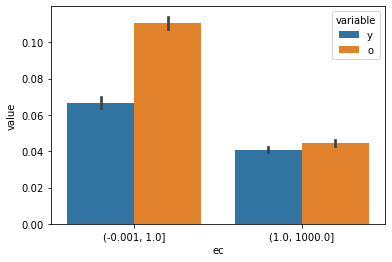

In [139]:
hv['ec']=pd.cut(hv.e_blood,[0,1,1000],include_lowest=True)
sns.barplot(data=hv[['y','o','ec']].melt('ec'),hue='variable',x='ec',y='value')

[(0.0, 0.4)]

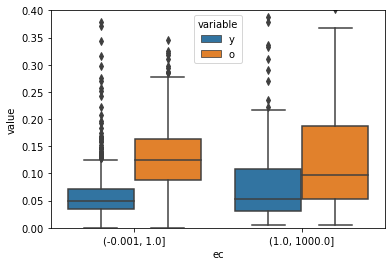

In [107]:
hv1=hv[hv.ezc==pd.Interval(100,1000)]
ax=sns.boxplot(data=hv1[['y','o','ec']].melt('ec'),hue='variable',x='ec',y='value')
ax.set(ylim=[0,.4])

In [77]:
bws=glob.glob('data/meth/skin/*.bw')
names=range(len(bws))
bws.sort()
for i in range(len(bws)):
    name=names[i]
    bw=pyBigWig.open(bws[i])
    hv[name]=hv.apply(lambda x: bw.stats(x['ch'],x['b'],x['e'],'mean')[0],axis=1)

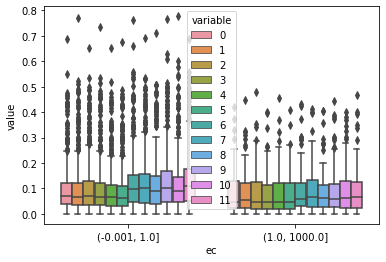

In [108]:
ax=sns.boxplot(data=hv1[list(range(12))+['ec']].melt('ec'),hue='variable',x='ec',y='value')

<AxesSubplot:>

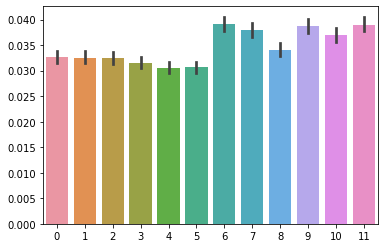

In [145]:
sns.barplot(data=hv[range(12)])

In [148]:
hv3=hv[hv.ezc==pd.Interval(0,10)]

<AxesSubplot:>

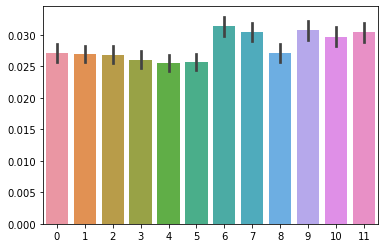

In [149]:
sns.barplot(data=hv3[range(12)])

<AxesSubplot:>

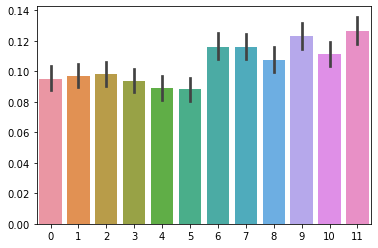

In [150]:
sns.barplot(data=hv1[range(12)])